# Ranking example

In [ ]:
import json
import numpy as np
from sklearn.manifold import TSNE
from sklearn.decomposition import TruncatedSVD
from sklearn.cluster import *
from sklearn.metrics import *
from sklearn.linear_model import *
from sklearn.preprocessing import *
from sklearn.model_selection import cross_val_score, KFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC
from sklearn.utils.testing import ignore_warnings
from sklearn.exceptions import ConvergenceWarning
import matplotlib.pyplot as plt
from matplotlib.cm import get_cmap
from matplotlib.lines import Line2D
import networkx as nx
import scipy.spatial
import matplotlib.pyplot as plt
import itertools
from tqdm.notebook import tqdm
from math import ceil

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.utils.testing module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.utils. Anything that cannot be imported from sklearn.utils is now part of the private API.
  warnings.warn(message, FutureWarning)


# Load data

In [ ]:
DIR = ''

In [ ]:
# embeddings file
with open(DIR + 'res_ddgk/ddgk_1000cg_randtype.json') as ff:
    data = list(map(json.loads, ff))
for i in range(len(data)):
    assert data[i]['idx'] == i

In [ ]:
keys = list([eval(k) for k in data[0]['embedding'].keys()])
keys.sort()
print(keys, len(keys))

[6, 28, 35, 57, 62, 68, 69, 79, 83, 84, 92, 113, 121, 124, 177, 237, 238, 269, 274, 280, 292, 298, 332, 333, 336, 340, 342, 353, 360, 363, 366, 371, 373, 376, 377, 383, 391, 395, 423, 439, 460, 464, 468, 473, 480, 481, 482, 486, 489, 498, 502, 520, 523, 548, 555, 578, 581, 594, 600, 605, 607, 616, 620, 622, 623, 626, 633, 653, 662, 663, 683, 688, 693, 704, 708, 709, 734, 743, 747, 750, 758, 762, 764, 766, 767, 770, 786, 788, 795, 817, 820, 821, 830, 833, 834, 842, 846, 847, 848, 853, 856, 860, 912, 913, 919, 926, 927, 942, 947, 961, 962, 963, 964, 971, 972, 981, 989, 993, 995, 997, 1000, 1003, 1004, 1007, 1008, 1011, 1013, 1022] 128


In [ ]:
# graphs file
with open(DIR + 'stratified_samples/cg_stratified_sample.json') as ff:
    graphs = [nx.node_link_graph(g) for g in json.load(ff)]

In [ ]:
prototypes = sorted(data[0]['embedding'].keys())
for g in data:
    assert prototypes == sorted(g['embedding'].keys())

In [ ]:
embeddings = [None] * len(data)
for g in data:
    embeddings[g['idx']] = [g['embedding'][i] for i in prototypes]
assert all(x is not None for x in embeddings)

In [ ]:
emb16d_orig = np.array(embeddings)

In [ ]:
print(len(emb16d_orig))

1033


# K neighbors


In [ ]:
# number of neighbors
K = 5

In [ ]:
# target graph
index = 30

In [ ]:
def draw_graph(g, ax=None):
  pos = nx.drawing.layout.spring_layout(g)
  node_names = nx.get_node_attributes(g,'name')
  node_types = nx.get_node_attributes(g,'type')
  labels = {k: '\n'.join((node_types[k], node_names[k])) for k in node_names}
  nx.draw_networkx(g, pos, labels=labels, ax=ax, node_size=300)
  nx.draw_networkx_edge_labels(g, pos, edge_labels=nx.get_edge_attributes(g,'key'), ax=ax)

In [ ]:
# tree
tree = scipy.spatial.KDTree(embeddings)

# K nearest neighbors
dist, idx = tree.query(embeddings[index], k=K+1)

# sort
temp = [(dist[i], idx[i]) for i in range(len(dist))]
neighbours = [(embeddings[i], d, i) for d, i in temp]
neighbours.sort(key=lambda e:e[1])

# to skip the event itself we consider neighbours[1:]
for v in vicini:
  print(v[1])
  print(graphs[v[2]].nodes.data('name'))

0.0
[('T38', 'mediated'), ('T2', 'neuroblastoma cells'), ('T1', 'p75'), ('T39', 'apoptosis')]
9.247681756757038
[('T37', 'NB cells'), ('T70', 'mediated'), ('T36', 'p75'), ('T71', 'apoptosis')]
142.29610044504693
[('T10', 'E1A'), ('T57', 'cause'), ('T58', 'death'), ('T61', 'apoptosis'), ('T13', 'cell')]
159.51243111127224
[('T46', 'dermal microvascular endothelial cells'), ('T106', 'caused'), ('T107', 'apoptosis'), ('T105', 'expression'), ('T45', 'umbilical vein'), ('T44', 'pAd-T34A')]
179.030322922883
[('T37', 'leading'), ('T12', 'neuronal cells'), ('T38', 'apoptosis'), ('T14', 'Bcl-2'), ('T36', 'increase'), ('T39', 'protection')]
195.61371127573238
[('T2', 'cell'), ('T47', 'induces'), ('T1', 'monocarboxylate transporters'), ('T48', 'death'), ('T44', 'Silencing')]


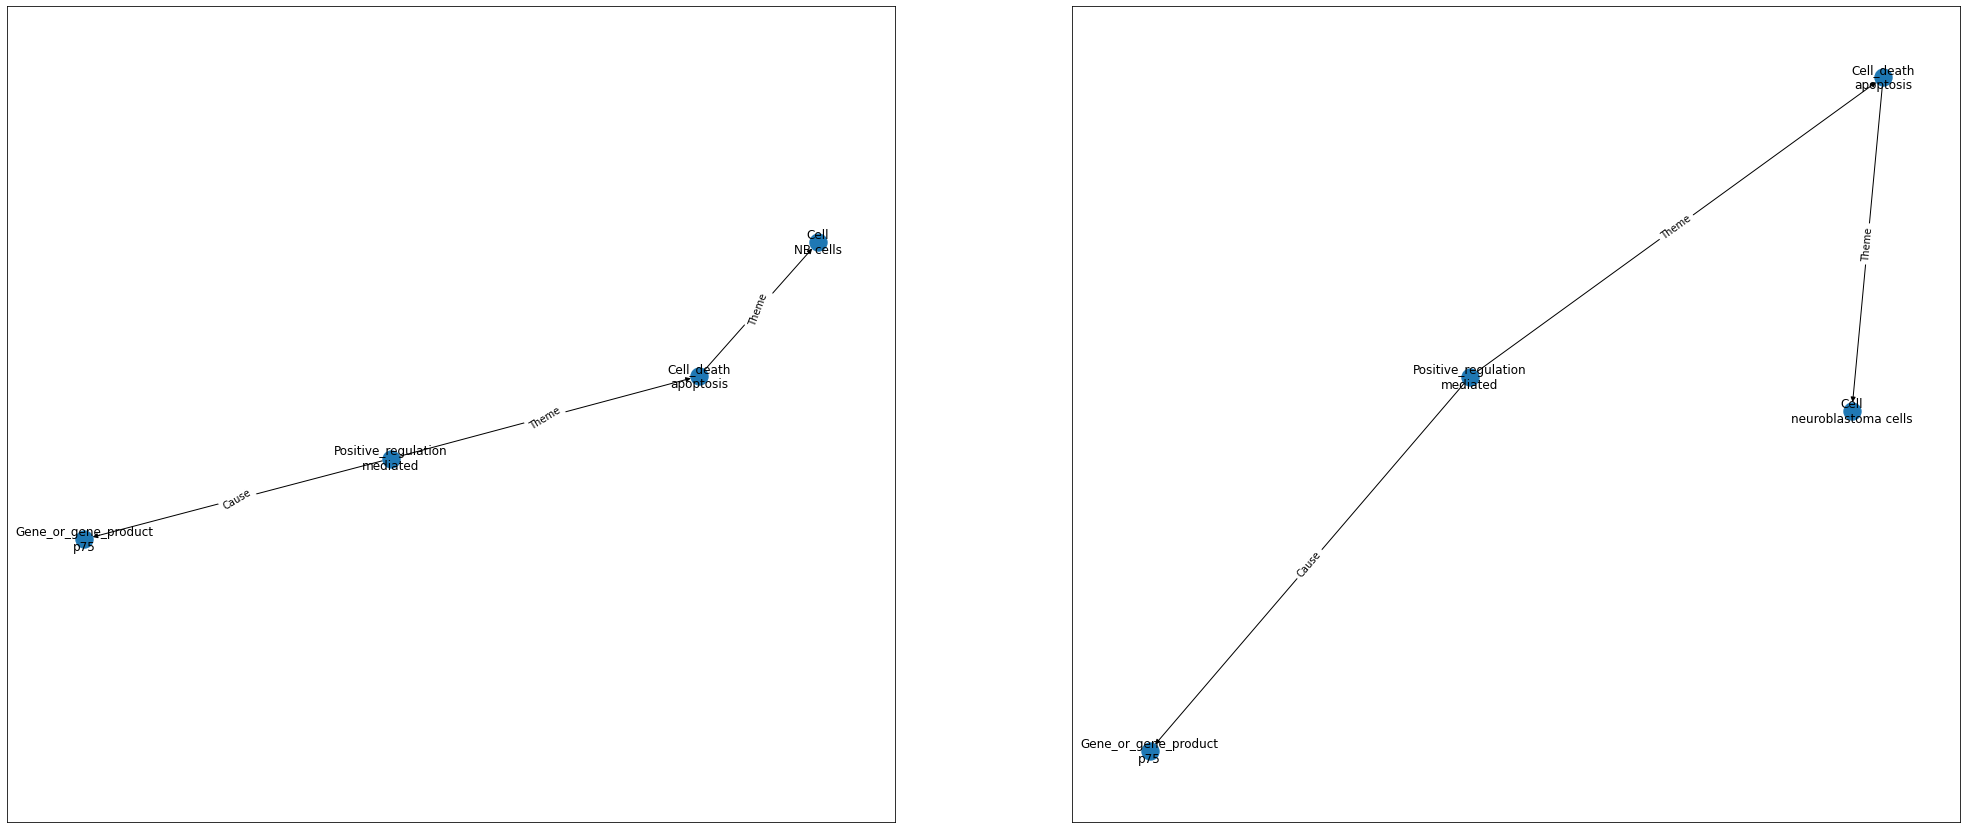

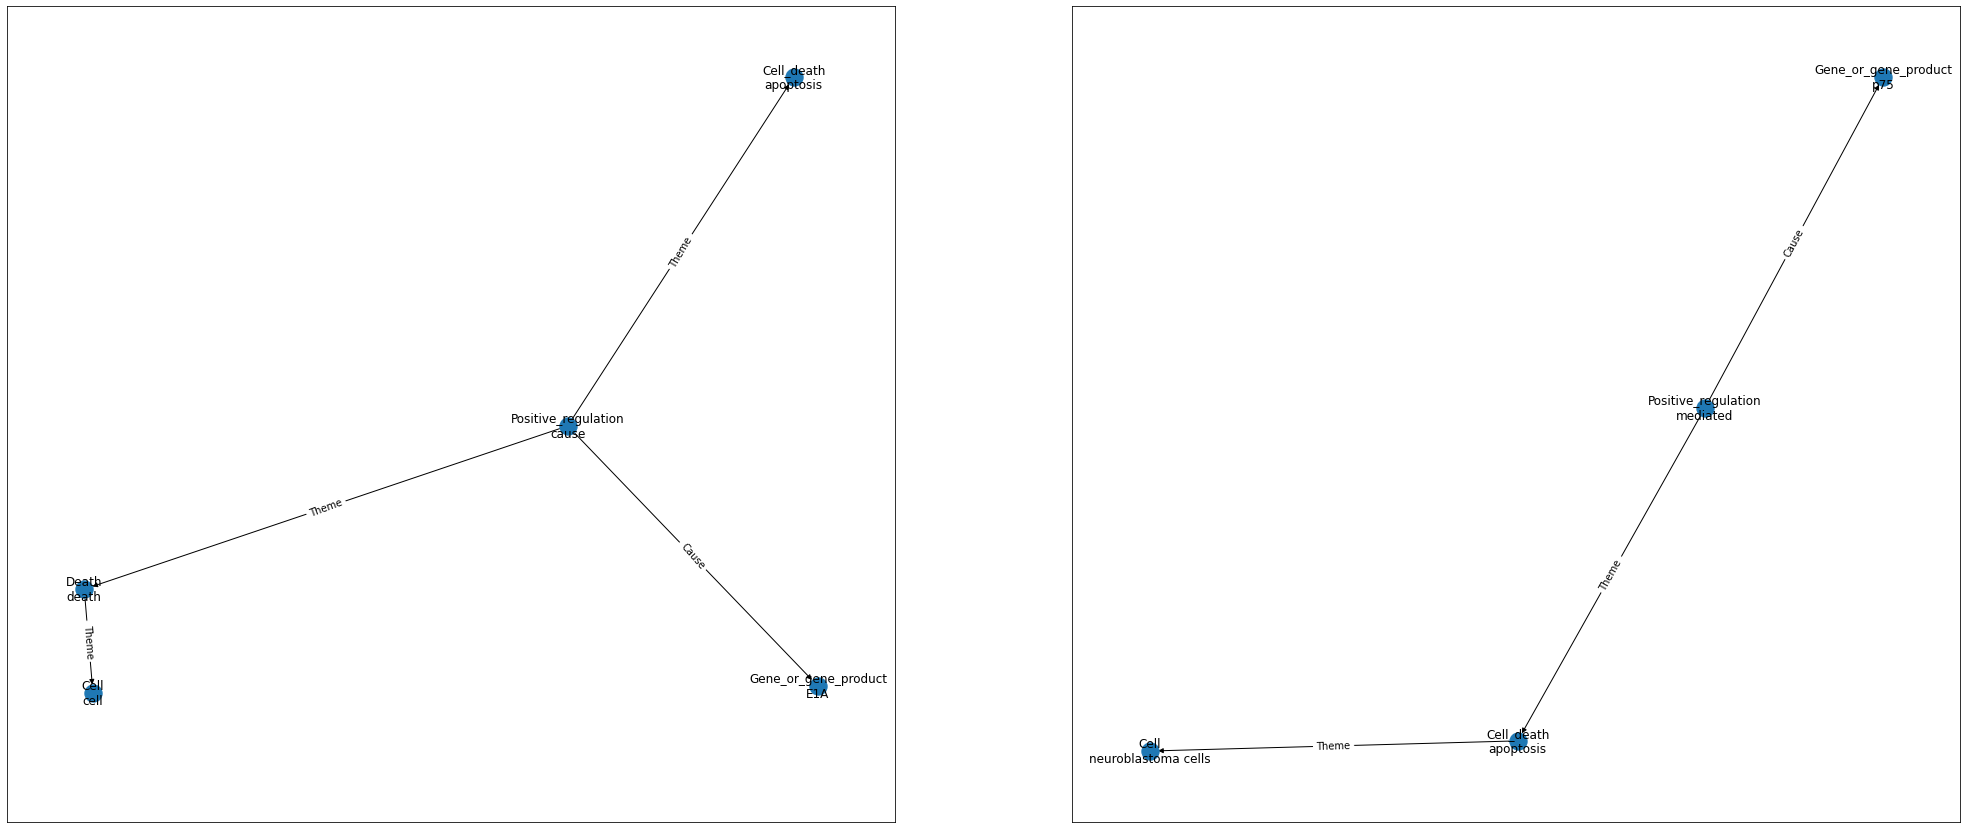

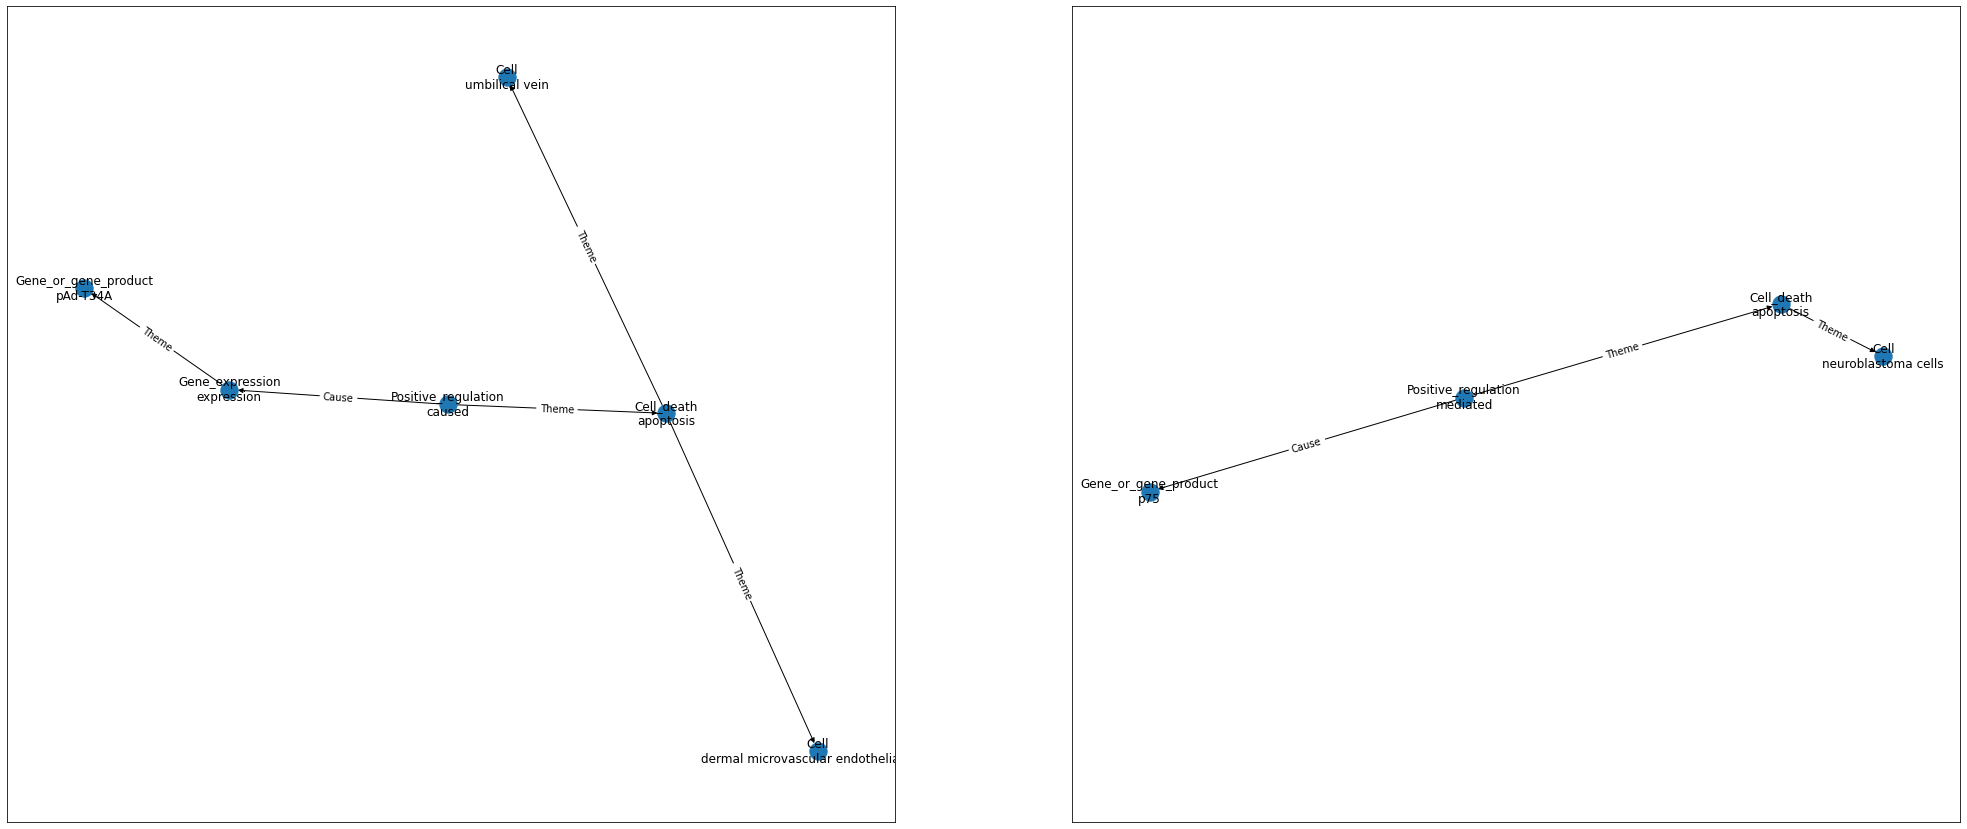

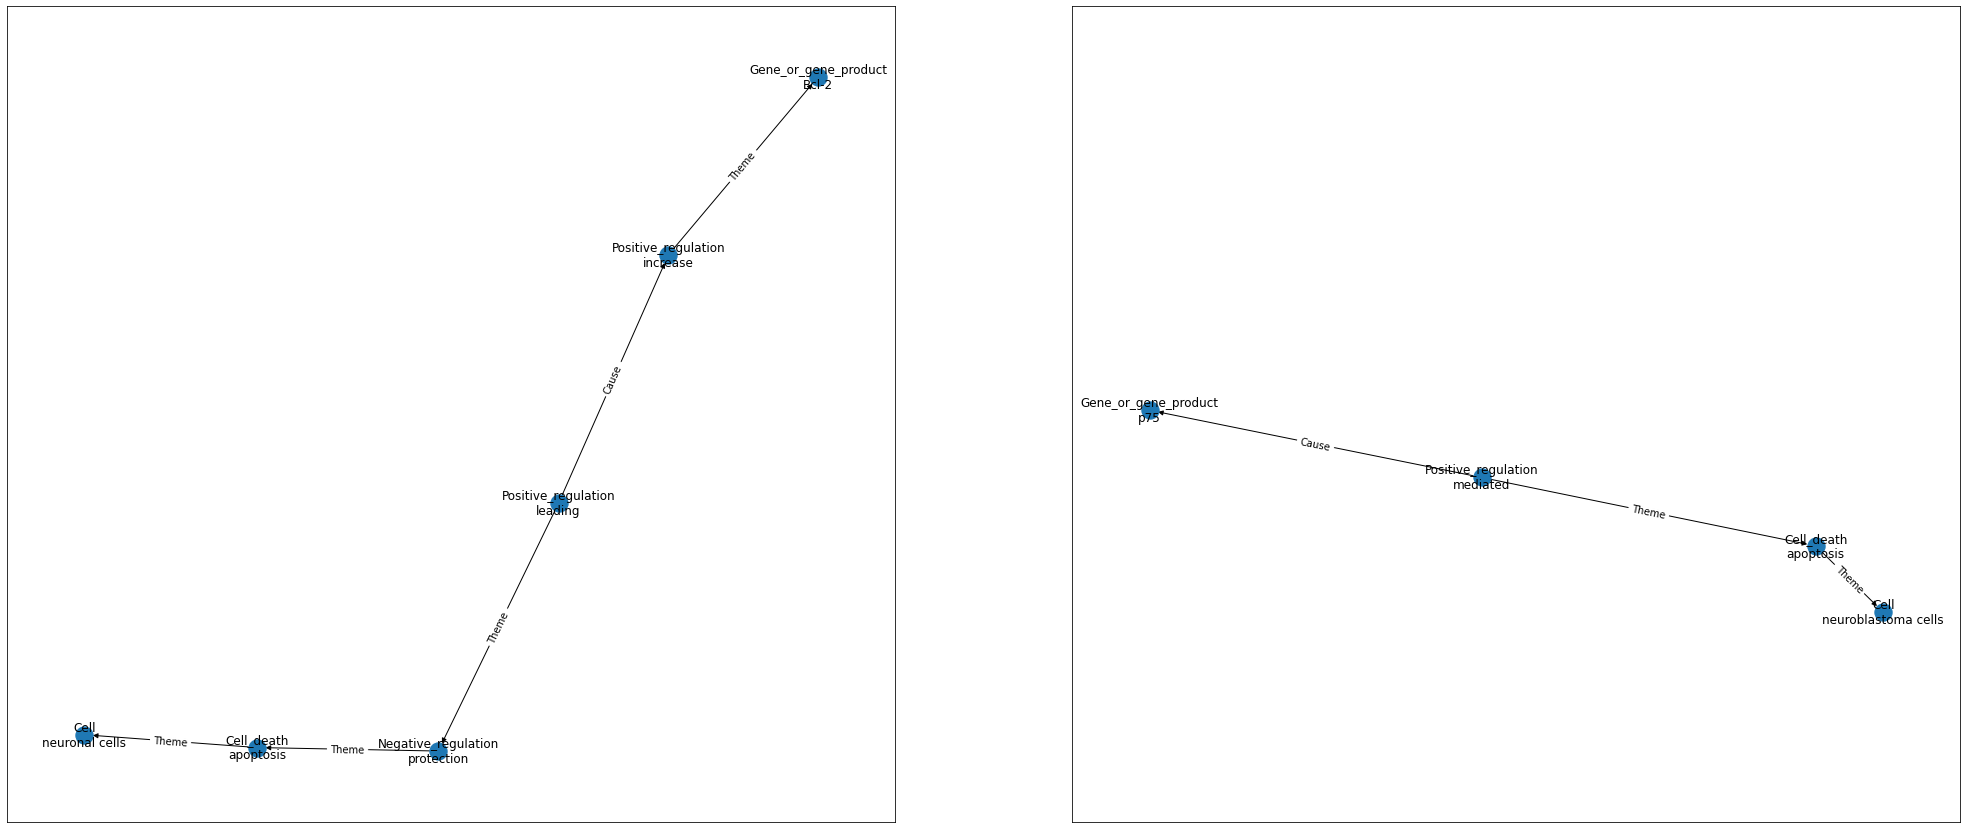

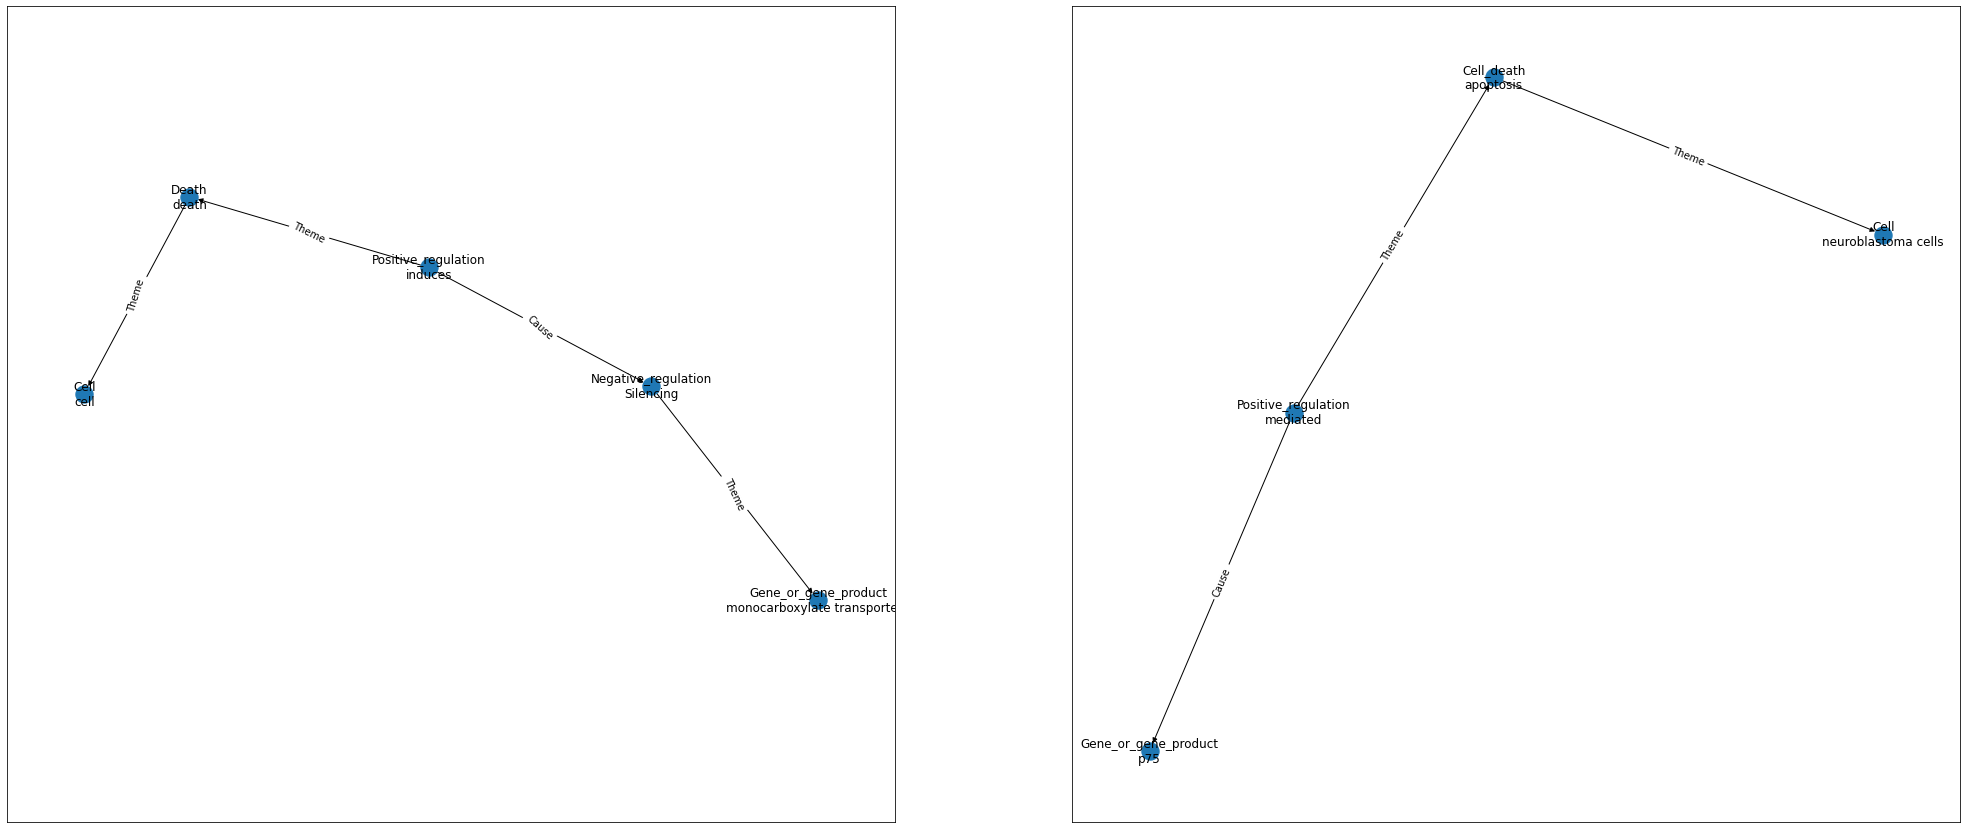

In [ ]:
for e, d, i in vicini[1:]:
  f, (ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize=(35, 15))
  g1 , g2 = graphs[i], graphs[index]
  draw_graph(g1, ax1)
  draw_graph(g2, ax2)

# Best visualizations

In [ ]:
pairs = set()
radius = 0
while len(pairs) <= 1:
    radius+=0.1
    pairs = tree.query_pairs(r=radius)

In [ ]:
radius

5.699999999999996

In [ ]:
pairs = tree.query_pairs(r=radius)

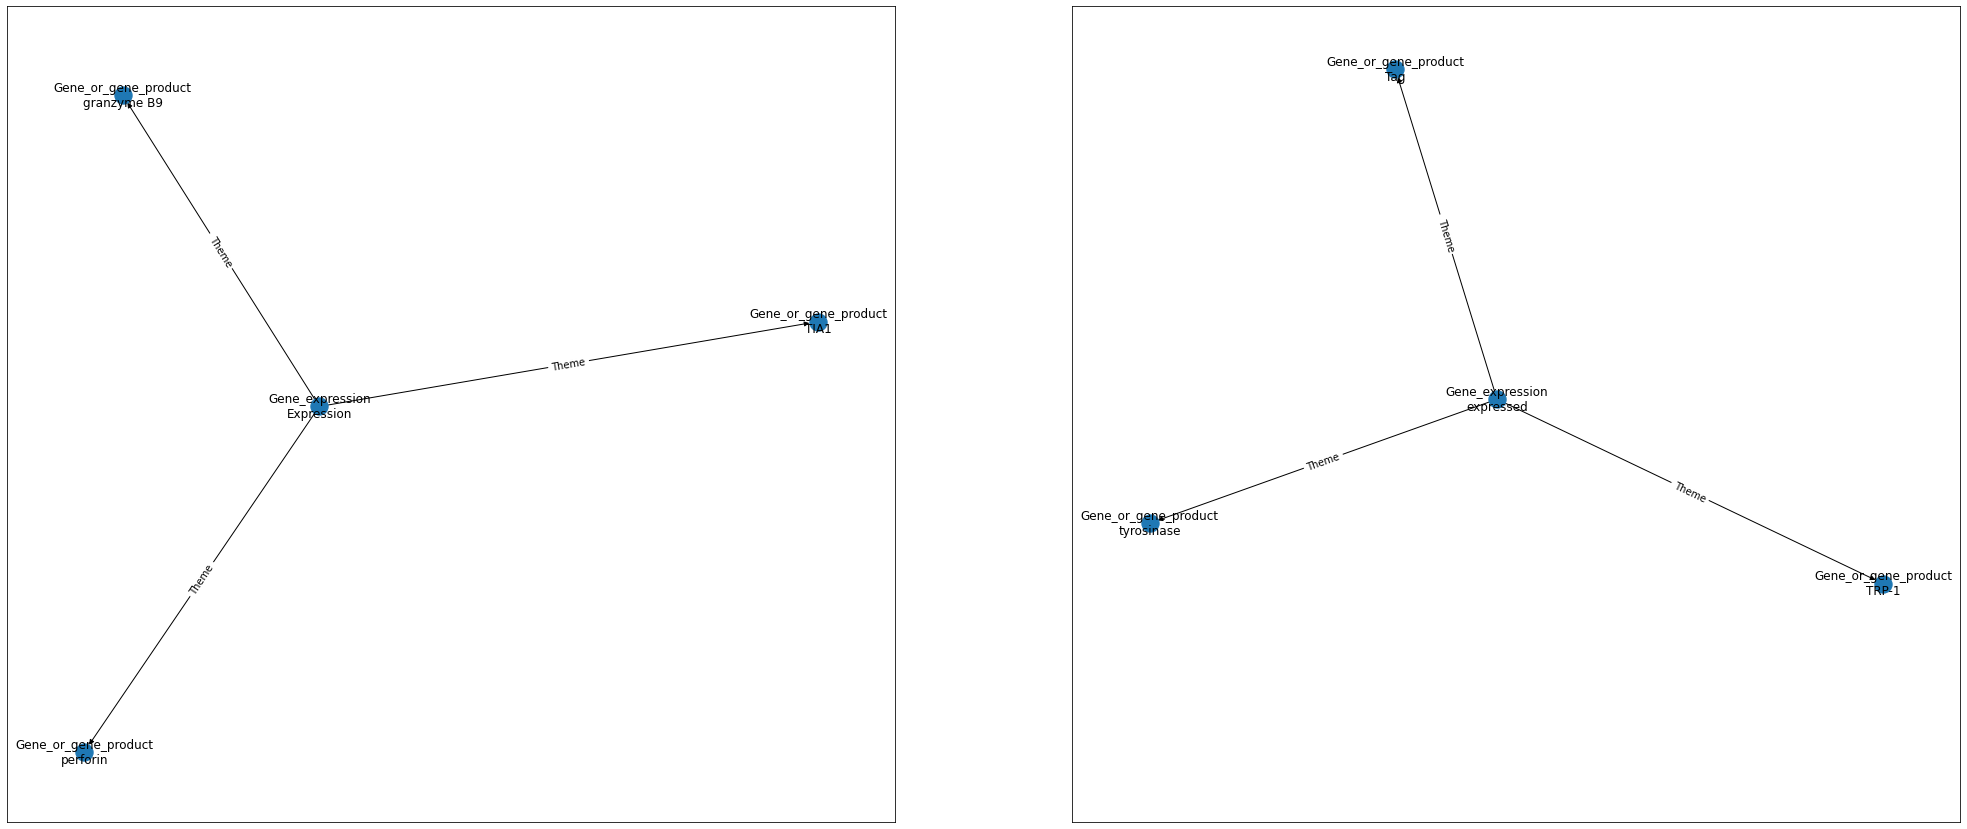

In [ ]:
g1, g2 = (graphs[i] for i in list(pairs)[-3])
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize=(35, 15))
draw_graph(g1, ax1)
draw_graph(g2, ax2)

In [ ]:
print(g1.nodes.data('name'), g2.nodes.data('name'))

[('T13', 'perforin'), ('T14', 'granzyme B9'), ('T16', 'TIA1'), ('T63', 'Expression')] [('T68', 'expressed'), ('T34', 'TRP-1'), ('T36', 'Tag'), ('T33', 'tyrosinase')]
